In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# 기초정보 확인 시작부분 보기
df.head(4)

,계산일자,통화코드,시장평균환율
0,2020-01-02,CNY,165.80
1,2020-01-02,EUR,1296.43
2,2020-01-02,JPY,1060.14
3,2020-01-02,USD,1157.80


In [10]:
# 기초정보 확인 끝부분 보기
df.tail(4)

,계산일자,통화코드,시장평균환율
996,2020-12-31,CNY,167.08
997,2020-12-31,EUR,1335.90
998,2020-12-31,JPY,1052.28
999,2020-12-31,USD,1088.00


In [12]:
df.describe()

,시장평균환율
count,1000.000000
mean,950.404390
std,459.720614
min,165.800000
25%,825.402500
50%,1134.960000
75%,1280.340000
max,1418.330000


In [13]:
ndf = df[['통화코드']]
ndf

,통화코드
0,CNY
1,EUR
2,JPY
3,USD
4,CNY
...,...
995,USD
996,CNY
997,EUR
998,JPY


# join
    * 인덱스 기반 가로로 합치기

In [17]:
# 컬럼 조건 선택 후 컬럼 지정을 통해 필요한 컬럼만 회수
udf = df[df['통화코드'] == 'USD'][['계산일자', '시장평균환율']]
cdf = df[df['통화코드'] == 'CNY'][['계산일자', '시장평균환율']]
jdf = df[df['통화코드'] == 'JPY'][['계산일자', '시장평균환율']]
edf = df[df['통화코드'] == 'EUR'][['계산일자', '시장평균환율']]

,계산일자,시장평균환율
3,2020-01-02,1157.8
7,2020-01-03,1156.9
11,2020-01-06,1162.7
15,2020-01-07,1169.6
19,2020-01-08,1165.3
...,...,...
983,2020-12-24,1108.9
987,2020-12-28,1103.7
991,2020-12-29,1098.2
995,2020-12-30,1093.2


In [24]:
# join 등의 경우 컬럼의 중복을 피하기 위해 컬럼명 변경
udf.columns = ['date', 'USD']
cdf.columns = ['date', 'CNY']
jdf.columns = ['date', 'JPY']
edf.columns = ['date', 'EUR']
# 인덱스를 맞추기 위해 date컬럼을 인덱스로 지정
sudf = udf.set_index('date')
scdf = cdf.set_index('date')
sjdf = jdf.set_index('date')
sedf = edf.set_index('date')
sedf

,EUR
date,
2020-01-02,1296.43
2020-01-03,1297.24
2020-01-06,1298.51
2020-01-07,1305.20
2020-01-08,1304.22
...,...
2020-12-24,1350.70
2020-12-28,1347.37
2020-12-29,1340.74


In [27]:
# join을 통한 가로 연결
tdf = sudf.join(scdf).join(sjdf).join(sedf)
tdf

,USD,CNY,JPY,EUR
date,,,,
2020-01-02,1157.8,165.80,1060.14,1296.43
2020-01-03,1156.9,166.06,1064.06,1297.24
2020-01-06,1162.7,166.88,1073.94,1298.51
2020-01-07,1169.6,167.76,1082.18,1305.20
2020-01-08,1165.3,167.46,1074.58,1304.22
...,...,...,...,...
2020-12-24,1108.9,169.57,1071.29,1350.70
2020-12-28,1103.7,169.18,1065.91,1347.37
2020-12-29,1098.2,168.49,1060.79,1340.74


<AxesSubplot:xlabel='date'>

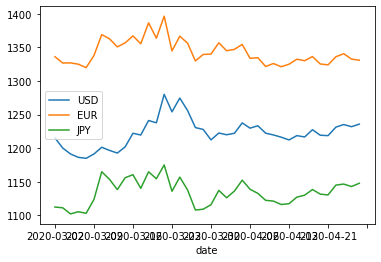

In [37]:
# 컬럼 선택을 통한 그래프 그리기
tdf[['USD', 'EUR', 'JPY']][40:80].plot()

<AxesSubplot:xlabel='date'>

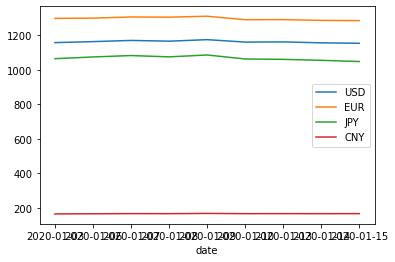

In [35]:
# 컬럼 필터링 및 인덱스 필터링을 통한 시각화
tdf[['USD', 'EUR', 'JPY', 'CNY']][1:10].plot()

# merge
* 특정열 기준으로 데이터 합치기

In [47]:
cate = ['USD', 'EUR', 'JPY', 'CNY']
dfdict = {}
for c in cate:
    dfdict[c] = df[df['통화코드'] == c][['계산일자', '시장평균환율']]
    dfdict[c].columns=['date', c]
    print(c, dfdict[c].head())

USD           date     USD
3   2020-01-02  1157.8
7   2020-01-03  1156.9
11  2020-01-06  1162.7
15  2020-01-07  1169.6
19  2020-01-08  1165.3
EUR           date      EUR
1   2020-01-02  1296.43
5   2020-01-03  1297.24
9   2020-01-06  1298.51
13  2020-01-07  1305.20
17  2020-01-08  1304.22
JPY           date      JPY
2   2020-01-02  1060.14
6   2020-01-03  1064.06
10  2020-01-06  1073.94
14  2020-01-07  1082.18
18  2020-01-08  1074.58
CNY           date     CNY
0   2020-01-02  165.80
4   2020-01-03  166.06
8   2020-01-06  166.88
12  2020-01-07  167.76
16  2020-01-08  167.46


In [48]:
dfdict['USD'].head()

,date,USD
3,2020-01-02,1157.8
7,2020-01-03,1156.9
11,2020-01-06,1162.7
15,2020-01-07,1169.6
19,2020-01-08,1165.3


In [49]:
# join보다 유연함
dfdict['USD'].merge(dfdict['EUR'])

,date,USD,EUR
0,2020-01-02,1157.8,1296.43
1,2020-01-03,1156.9,1297.24
2,2020-01-06,1162.7,1298.51
3,2020-01-07,1169.6,1305.20
4,2020-01-08,1165.3,1304.22
...,...,...,...
245,2020-12-24,1108.9,1350.70
246,2020-12-28,1103.7,1347.37
247,2020-12-29,1098.2,1340.74
248,2020-12-30,1093.2,1337.73


In [59]:
# 월초 환율만 가져오기 위해 월초(MS옵션) date range정보 생성
# date range정보는 시간정보도 담고있는 64비트 date 형식
# csv에서 받아온 날짜는 str 형태여서
# 데이터 merge(특정컬럼 기반 합치기) 위해 date range 테이터 타입을 str로 변환
d2 = pd.date_range('2020-01-01', periods = 12, freq = '2MS').astype('str')
d2df = pd.DataFrame(d2, columns = ['date'])

d3 = pd.date_range('2020-01-01', periods = 12, freq = '3MS').astype('str')
d3df = pd.DataFrame(d3, columns = ['date'])
print(d2df, '\n\n', d3df)

          date
0   2020-01-01
1   2020-03-01
2   2020-05-01
3   2020-07-01
4   2020-09-01
5   2020-11-01
6   2021-01-01
7   2021-03-01
8   2021-05-01
9   2021-07-01
10  2021-09-01
11  2021-11-01 

           date
0   2020-01-01
1   2020-04-01
2   2020-07-01
3   2020-10-01
4   2021-01-01
5   2021-04-01
6   2021-07-01
7   2021-10-01
8   2022-01-01
9   2022-04-01
10  2022-07-01
11  2022-10-01


In [60]:
# merge의 how옵션을 통해 좌우측 어떤 정보를 남길 것인지 판단
# merge의 how옵션의 default는 inner
# how = left일 때 정보가 없으면 Nan으로 처리
# on은 기준 컬럼 지정 없으면 None : 동일컬럼 기반 머지
ud2df = d2df.merge(dfdict['USD'], how = 'left', on ='date')
ud2df

,date,USD
0,2020-01-01,NaN
1,2020-03-01,NaN
2,2020-05-01,NaN
3,2020-07-01,1198.5
4,2020-09-01,1183.3
5,2020-11-01,NaN
6,2021-01-01,NaN
7,2021-03-01,NaN
8,2021-05-01,NaN
9,2021-07-01,NaN


In [61]:
ed3df = d3df.merge(dfdict['EUR'], how = 'left', on ='date')
print(ed3df,'\n\n',ud2df)

          date      EUR
0   2020-01-01      NaN
1   2020-04-01  1344.94
2   2020-07-01  1346.52
3   2020-10-01      NaN
4   2021-01-01      NaN
5   2021-04-01      NaN
6   2021-07-01      NaN
7   2021-10-01      NaN
8   2022-01-01      NaN
9   2022-04-01      NaN
10  2022-07-01      NaN
11  2022-10-01      NaN 

           date     USD
0   2020-01-01     NaN
1   2020-03-01     NaN
2   2020-05-01     NaN
3   2020-07-01  1198.5
4   2020-09-01  1183.3
5   2020-11-01     NaN
6   2021-01-01     NaN
7   2021-03-01     NaN
8   2021-05-01     NaN
9   2021-07-01     NaN
10  2021-09-01     NaN
11  2021-11-01     NaN


In [62]:
# 기본옵션 left = inner, on = None 동일컬럼 기반
ud2df.merge(ed3df)

,date,USD,EUR
0,2020-01-01,NaN,NaN
1,2020-07-01,1198.5,1346.52
2,2021-01-01,NaN,NaN
3,2021-07-01,NaN,NaN


In [63]:
# 먼저 시작된 df에 맞춤
ud2df.merge(ed3df, how = 'left')

,date,USD,EUR
0,2020-01-01,NaN,NaN
1,2020-03-01,NaN,NaN
2,2020-05-01,NaN,NaN
3,2020-07-01,1198.5,1346.52
4,2020-09-01,1183.3,NaN
5,2020-11-01,NaN,NaN
6,2021-01-01,NaN,NaN
7,2021-03-01,NaN,NaN
8,2021-05-01,NaN,NaN
9,2021-07-01,NaN,NaN


In [64]:
# 붙이는 df에 맞춤
ud2df.merge(ed3df, how = 'right')

,date,USD,EUR
0,2020-01-01,NaN,NaN
1,2020-04-01,NaN,1344.94
2,2020-07-01,1198.5,1346.52
3,2020-10-01,NaN,NaN
4,2021-01-01,NaN,NaN
5,2021-04-01,NaN,NaN
6,2021-07-01,NaN,NaN
7,2021-10-01,NaN,NaN
8,2022-01-01,NaN,NaN
9,2022-04-01,NaN,NaN


In [65]:
# 있는 정보는 다 합치는
ud2df.merge(ed3df, how = 'outer')

,date,USD,EUR
0,2020-01-01,NaN,NaN
1,2020-03-01,NaN,NaN
2,2020-05-01,NaN,NaN
3,2020-07-01,1198.5,1346.52
4,2020-09-01,1183.3,NaN
5,2020-11-01,NaN,NaN
6,2021-01-01,NaN,NaN
7,2021-03-01,NaN,NaN
8,2021-05-01,NaN,NaN
9,2021-07-01,NaN,NaN


In [67]:
# outer 정렬 시 기준컬럼 정렬이 안 된 경우 sort 옵션 사용
outdf = ud2df.merge(ed3df, how = 'outer', sort = True)

In [68]:
# 데이터 csv로 저장하기
# 읽을 때는 pd.read_csv였지만
# 쓸 때는 해당 dataframe.to_csv 임
outdf.to_csv('../csvs/mergetest.csv')